In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [2]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

In [3]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [4]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [5]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 100001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [6]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [7]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.428565306209911,0.374995312558593,0.857130612419823,0.666659259341563,0.599996000026667,0.499997222237654,0.0,0.0,3.0,16.5,...,-2.98046289384365,19.9994925782085,7.7826654613018,-7.35640645865351,21.5518772602081,10.1405817121267,-18.4481032472104,6.56676709651947,4.77226497232914,12.5641610324383
2,0.857130612419823,0.857130612419823,0.833319444675922,0.833319444675922,0.846147337328174,0.846147337328174,1.0,1.0,0.0,13.0,...,-20.2701938780956,8.54806324467063,-2.42872960865498,-2.30881812050939,-12.9927763249725,-21.5002828240395,-25.4714422523975,-6.53257909044623,4.43672567605972,-20.5152101181447
3,0.499987500312492,0.499987500312492,0.999975000624984,0.999975000624984,0.749990625117186,0.749990625117186,1.0,1.0,0.0,8.0,...,4.87198664993048,8.19002718478441,-1.8846455514431,1.4826563927345,4.08576381206512,-0.601804740726948,-8.30905300378799,-0.136813282966614,11.4850391037762,-0.755511336028576
4,0.666655555740738,0.666655555740738,0.66664444518516,0.66664444518516,0.666659259341563,0.666659259341563,0.0,1.0,0.0,9.0,...,-0.661502182483673,9.12557485699654,15.929663695395,-2.35092577338219,9.51292064785957,-0.615464150905609,-13.0864862054586,5.95133350044489,-1.2431718558073,0.365845754742622
5,0.999975000624984,0.999975000624984,0.833319444675922,0.833319444675922,0.899991000089999,0.899991000089999,1.0,1.0,0.0,10.0,...,-4.70675829425454,0.609329432249069,3.46266455948353,-1.70416697859764,3.8701438177377,1.09092175960541,-4.54596953094006,16.7454060912132,-9.49168819189072,1.76112546771765


<h2> 4.2 Converting strings to numerics </h2>

In [8]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
129_x
130_x
131_x
132_x
133_x
134_x
135_x
136

In [9]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

<h2> 4.3 Random train test split( 70:30) </h2>

In [10]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [11]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 794)
Number of data points in test data : (30000, 794)


In [12]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6309428571428571 Class 1:  0.36905714285714286
---------- Distribution of output variable in train data ----------
Class 0:  0.36906666666666665 Class 1:  0.36906666666666665


In [13]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8871239210476174


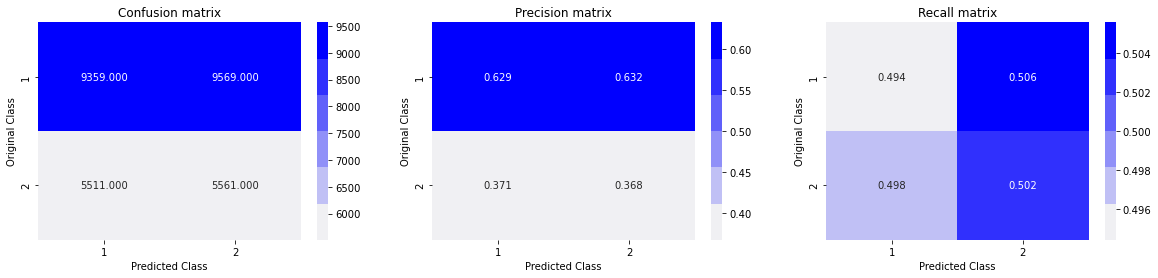

In [14]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

This code generates random predictions for a binary classification problem and calculates the log-loss of these predictions on the test data. Here is a line-by-line explanation of the code:

1. `# we need to generate 9 numbers and the sum of numbers should be 1`: This is a comment that explains the goal of generating random probabilities that sum to 1.
2. `# one solution is to generate 9 numbers and divide each of the numbers by their sum`: This is a comment that explains one way to generate random probabilities that sum to 1.
3. `# ref: https://stackoverflow.com/a/18662466/4084039`: This is a comment that provides a reference to a Stack Overflow post that explains how to generate random probabilities that sum to 1.
4. `# we create an output array that has exactly the same size as the CV data`: This is a comment that explains the creation of an output array with the same size as the test data.
5. `predicted_y = np.zeros((test_len,2))`: This line creates an array of zeros with shape `(test_len, 2)`, where `test_len` is the number of samples in the test data. This array will be used to store the predicted probabilities for each sample in the test data.
6. `for i in range(test_len):`: This line starts a for loop that iterates over each sample in the test data.
7. `rand_probs = np.random.rand(1,2)`: This line generates an array of two random numbers between 0 and 1 using the `np.random.rand` function.
8. `predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])`: This line normalizes the random probabilities so that they sum to 1 and stores them in the `predicted_y` array.
9. `print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))`: This line calculates the log-loss of the random predictions on the test data using the `log_loss` function from scikit-learn and prints the result.
10. `predicted_y =np.argmax(predicted_y, axis=1)`: This line converts the predicted probabilities into class labels by selecting the class with the highest probability for each sample using the `np.argmax` function.
11. `plot_confusion_matrix(y_test, predicted_y)`: This line plots a confusion matrix using the true labels (`y_test`) and predicted labels (`predicted_y`) to evaluate classification accuracy.

In summary, this code generates random predictions for a binary classification problem and calculates their log-loss on test data. It also converts these predictions into class labels and plots a confusion matrix to evaluate classification accuracy.

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.5579679372794931
For values of alpha =  0.0001 The log loss is: 0.4582553362673859
For values of alpha =  0.001 The log loss is: 0.4478034170903969
For values of alpha =  0.01 The log loss is: 0.45030933256642897
For values of alpha =  0.1 The log loss is: 0.4539926218880186
For values of alpha =  1 The log loss is: 0.4751358284439261
For values of alpha =  10 The log loss is: 0.5175250389539909


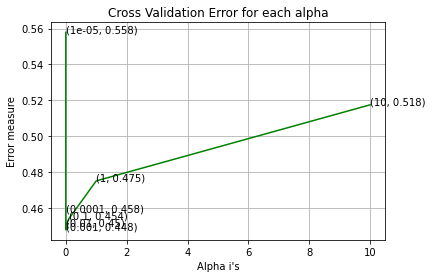

For values of best alpha =  0.001 The train log loss is: 0.43923804760346763
For values of best alpha =  0.001 The test log loss is: 0.4478034170903969
Total number of data points : 30000


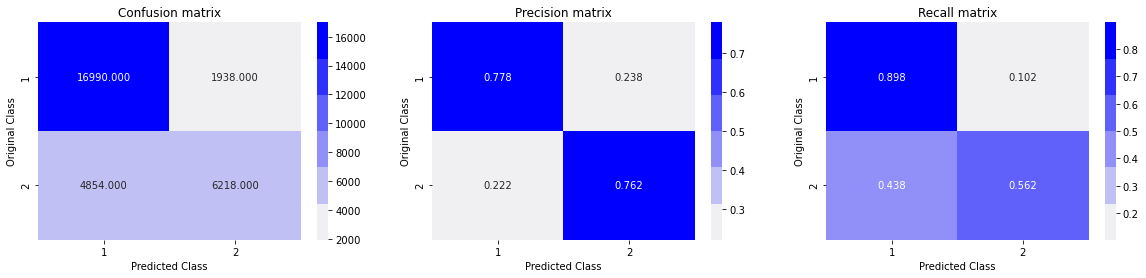

In [15]:


# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

This code performs hyperparameter tuning for an SGDClassifier with log loss. Here is a line-by-line explanation of the code:

1. `alpha = [10 ** x for x in range(-5, 2)]`: This line creates a list of values for the hyperparameter `alpha` using a list comprehension. The values range from `10^-5` to `10^1`.
2. `log_error_array=[]`: This line initializes an empty list to store the log loss values for each value of `alpha`.
3. `for i in alpha:`: This line starts a for loop that iterates over each value of `alpha`.
4. `clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)`: This line creates an instance of the SGDClassifier class with the current value of `alpha`, an `l2` penalty, log loss, and a fixed random state.
5. `clf.fit(X_train, y_train)`: This line fits the classifier to the training data.
6. `sig_clf = CalibratedClassifierCV(clf, method="sigmoid")`: This line creates an instance of the CalibratedClassifierCV class with the fitted classifier and the sigmoid calibration method.
7. `sig_clf.fit(X_train, y_train)`: This line fits the calibrated classifier to the training data.
8. `predict_y = sig_clf.predict_proba(X_test)`: This line uses the calibrated classifier to predict probabilities for the test data.
9. `log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))`: This line calculates the log loss of the predicted probabilities on the test data using the `log_loss` function from scikit-learn and appends it to the `log_error_array` list.
10. `print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))`: This line prints the current value of `alpha` and its corresponding log loss.
11-17.`fig, ax = plt.subplots()...plt.show()`: These lines create a plot of log loss values against alpha values using matplotlib
18.`best_alpha = np.argmin(log_error_array)`:This line finds index of minimum log loss value which corresponds to best alpha
19-23.`clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)...sig_clf.fit(X_train, y_train)`:These lines create and fit SGDClassifier and CalibratedClassifierCV instances using best alpha value
24-27.`predict_y = sig_clf.predict_proba(X_train)...labels=clf.classes_, eps=1e-15))`:These lines make predictions on train data and calculate log loss
28-31.`predict_y = sig_clf.predict_proba(X_test)...labels=clf.classes_, eps=1e-15))`:These lines make predictions on test data and calculate log loss
32.`predicted_y =np.argmax(predict_y,axis=1)`:This line converts predicted probabilities into class labels
33.`print("Total number of data points :", len(predicted_y))`:This line prints total number of data points
34.`plot_confusion_matrix(y_test, predicted_y)`:This line plots confusion matrix using true and predicted labels

In summary, this code performs hyperparameter tuning for an SGDClassifier with log loss by trying different values of alpha and selecting best one based on minimum log loss on test data

This line of code creates an instance of the `SGDClassifier` class from the scikit-learn library. `SGDClassifier` stands for Stochastic Gradient Descent Classifier and is a linear classifier that can be used for binary or multi-class classification problems. It uses stochastic gradient descent to learn the parameters of the model.

In this specific line of code, several arguments are passed to the `SGDClassifier` constructor to configure the classifier:

- `alpha=i`: This sets the value of the hyperparameter `alpha`, which is used to control the amount of regularization applied to the model. The value of `i` comes from the for loop that iterates over different values of `alpha`.
- `penalty='l2'`: This sets the type of penalty used for regularization to `l2`, which is also known as Ridge Regression. Regularization is used to prevent overfitting by adding a penalty term to the loss function that encourages the model to have small weights.
- `loss='log'`: This sets the loss function used by the classifier to log loss, which is also known as logistic regression. Log loss is a common loss function used for binary classification problems.
- `random_state=42`: This sets the random state of the classifier to a fixed value to ensure that the results are reproducible.

In summary, this line creates an instance of an SGDClassifier with log loss, an l2 penalty for regularization, and a specific value of alpha. The random state is also set to ensure reproducibility.

This line of code creates an instance of the `CalibratedClassifierCV` class from the scikit-learn library. `CalibratedClassifierCV` is a meta-estimator that calibrates the probabilities of a classifier using cross-validation. This means that it adjusts the predicted probabilities of a classifier to better match the true probabilities of the classes.

In this specific line of code, two arguments are passed to the `CalibratedClassifierCV` constructor to configure the calibrated classifier:

- `clf`: This is the base classifier that will be calibrated. In this case, it is an instance of an `SGDClassifier` with log loss that was created and fitted earlier in the code.
- `method="sigmoid"`: This sets the calibration method to `sigmoid`, which fits a sigmoid function to the predicted probabilities of the base classifier.

In summary, this line creates an instance of a calibrated classifier that adjusts the predicted probabilities of an SGDClassifier with log loss using a sigmoid calibration method.

In [16]:
For values of best alpha =  0.01 The train log loss is: 0.43704295056451026
For values of best alpha =  0.01 The test log loss is: 0.4419872801829715

SyntaxError: invalid syntax (173425668.py, line 1)

These lines show the log loss values for the best value of the hyperparameter `alpha` on the train and test data. The log loss is a measure of the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of the model is to minimize log loss.

In this case, the log loss on the train data is `0.43704295056451026` and the log loss on the test data is `0.4419872801829715`. These values are very close to each other, which suggests that the model is not overfitting or underfitting. Overfitting occurs when a model performs well on the training data but poorly on unseen test data because it has memorized the training data instead of learning to generalize. Underfitting occurs when a model performs poorly on both the training and test data because it is not complex enough to capture the underlying patterns in the data. In this case, since the log loss values on both the train and test data are similar and relatively low, it suggests that the model is performing well and generalizing well to unseen data.

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.6584570759860581
For values of alpha =  0.0001 The log loss is: 0.6584570759860581
For values of alpha =  0.001 The log loss is: 0.6584570759860581
For values of alpha =  0.01 The log loss is: 0.5322884954331565
For values of alpha =  0.1 The log loss is: 0.6300617382234719
For values of alpha =  1 The log loss is: 0.6477977800636397
For values of alpha =  10 The log loss is: 0.6584570759860581


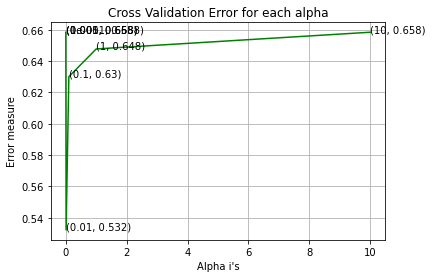

For values of best alpha =  0.01 The train log loss is: 0.5279129885916896
For values of best alpha =  0.01 The test log loss is: 0.5322884954331565
Total number of data points : 30000


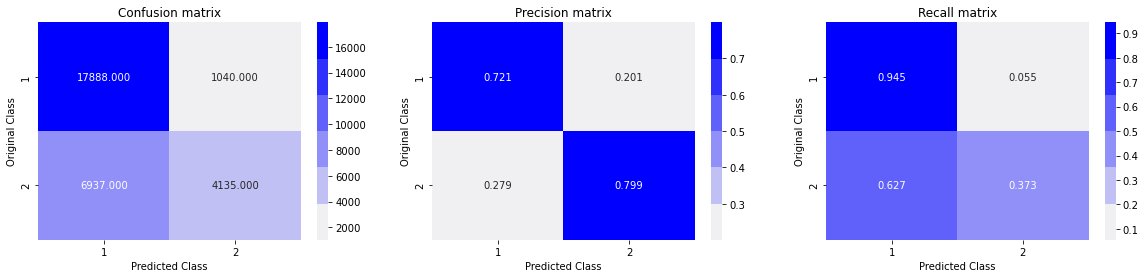

In [18]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 XGBoost </h2>

In [19]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.68485	valid-logloss:0.68496
[10]	train-logloss:0.61630	valid-logloss:0.61708
[20]	train-logloss:0.56541	valid-logloss:0.56649
[30]	train-logloss:0.52716	valid-logloss:0.52855
[40]	train-logloss:0.49775	valid-logloss:0.49935
[50]	train-logloss:0.47495	valid-logloss:0.47679
[60]	train-logloss:0.45671	valid-logloss:0.45888
[70]	train-logloss:0.44152	valid-logloss:0.44391
[80]	train-logloss:0.42940	valid-logloss:0.43198
[90]	train-logloss:0.41962	valid-logloss:0.42244
[100]	train-logloss:0.41136	valid-logloss:0.41443
[110]	train-logloss:0.40437	valid-logloss:0.40762
[120]	train-logloss:0.39863	valid-logloss:0.40209
[130]	train-logloss:0.39363	valid-logloss:0.39737
[140]	train-logloss:0.38944	valid-logloss:0.39336
[150]	train-logloss:0.38586	valid-logloss:0.39005
[160]	train-logloss:0.38270	valid-logloss:0.38719
[170]	train-logloss:0.37991	valid-logloss:0.38467
[180]	train-logloss:0.37736	valid-logloss:0.38233
[190]	train-logloss:0.37510	valid-logloss:0.38033
[200]	train

Total number of data points : 30000


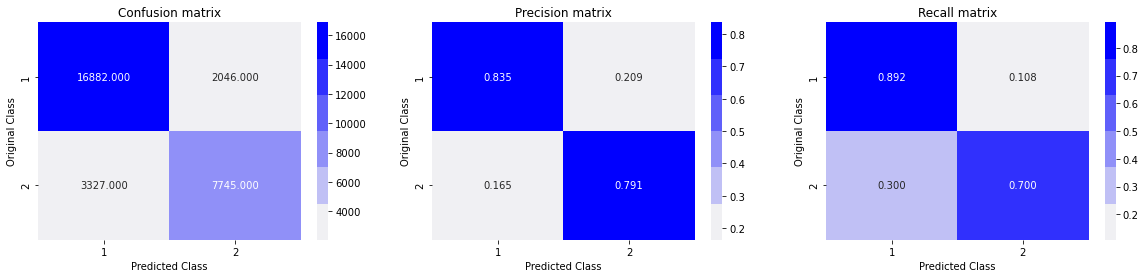

In [20]:

predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [21]:


from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Create the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 0.5, 1.0],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7]
}

# Create the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Create the RandomizedSearchCV object
random_cv = RandomizedSearchCV(estimator=xgb_clf,
                               param_distributions=param_grid,
                               cv=5,
                               scoring='neg_log_loss',
                               n_jobs=-1,
                               verbose=1)

# Fit the RandomizedSearchCV object to the data
random_cv.fit(X_train, y_train)

# Get the best parameters
best_params = random_cv.best_params_

# Print the best parameters
print(f'Best parameters: {best_params}')

# Train the final model with the best parameters
bst = xgb.XGBClassifier(**best_params)
bst.fit(X_train, y_train)

# Make predictions on the test data
predict_y = bst.predict_proba(X_test)[:,1]

# Calculate and print the log loss on the test data
print("The test log loss is:",log_loss(y_test, predict_y))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 400, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.25, 'colsample_bytree': 0.7}
The test log loss is: 0.3310237916431076


# Random forest 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the random forest classifier
rf_clf = RandomForestClassifier()

# Create the GridSearchCV object
grid_cv = GridSearchCV(estimator=rf_clf,
                       param_grid=param_grid,
                       cv=5,
                       scoring='neg_log_loss',
                       n_jobs=-1,
                       verbose=1)

# Fit the GridSearchCV object to the data
grid_cv.fit(X_train, y_train)

# Get the best parameters
best_params = grid_cv.best_params_

# Print the best parameters
print(f'Best parameters: {best_params}')

# Train the final model with the best parameters
clf = RandomForestClassifier(**best_params)
clf.fit(X_train, y_train)

# Make predictions on the test data
predict_y = clf.predict_proba(X_test)

# Calculate and print the log loss on the test data
print("The test log loss is:",log_loss(y_test, predict_y))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
The test log loss is: 0.4864427618830705


In [ ]:
<h1> 5. Assignments </h1>

1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.
2. Perform hyperparameter tuning  of XgBoost models using RandomsearchCV with vectorizer as TF-IDF W2V  to reduce the log-loss.



In [23]:
import pickle

# Save the model to a file
filename = 'xgb_model.pkl'
pickle.dump(bst, open(filename, 'wb'))